In [ ]:
! pip install langchain langchain-google-genai pillow anthropic

In [4]:
from langchain.prompts import PromptTemplate

prompt=(
    PromptTemplate.from_template(
        """
        너는 요리사야. 내가 가진 재료들을 갖고 만들 수 있는 요리를 {개수}개를 추천하고,
        그 요리의 레시피를 제시해줘. 내가 가진 재료는 아래와 같아.
        {재료}
        """
    )
)

prompt

PromptTemplate(input_variables=['개수', '재료'], input_types={}, partial_variables={}, template='\n        너는 요리사야. 내가 가진 재료들을 갖고 만들 수 있는 요리를 {개수}개를 추천하고,\n        그 요리의 레시피를 제시해줘. 내가 가진 재료는 아래와 같아.\n        {재료}\n        ')

In [5]:
prompt.format(개수=3, 재료="사과, 양파, 계란")

'\n        너는 요리사야. 내가 가진 재료들을 갖고 만들 수 있는 요리를 3개를 추천하고,\n        그 요리의 레시피를 제시해줘. 내가 가진 재료는 아래와 같아.\n        사과, 양파, 계란\n        '

In [68]:
import getpass
import os
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage
from langchain.prompts import ChatPromptTemplate

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Google AI API 키를 입력하세요: ")

messages = [
    SystemMessage(content="당신은 친절하고 도움이 되는 AI 비서입니다."),
    HumanMessage(content="오늘 날씨 어때?"),
    AIMessage(content="오늘 날씨는 맑고 화창합니다."),
    HumanMessage(content="f{user_input}"),
]

# Access the correct element in the list and format its content
# new_prompt[2] = HumanMessage(content=new_prompt[2].content.format(input="오늘 너의 기분은 어때?"))

llm = ChatGoogleGenerativeAI(model="gemini-pro")

In [72]:
from langchain.chains import LLMChain
from langchain_google_genai import ChatGoogleGenerativeAI

model= ChatGoogleGenerativeAI(model="gemini-1.5-pro-latest", temperature=0)
prompt = ChatPromptTemplate.from_messages(messages)
chain = LLMChain(llm=model, prompt=prompt)
response = chain.invoke({"user_input":"오늘 한국 세종자치시의 온도는 어때?"})
print(response['text'])

죄송합니다. 위치 정보가 없어서 오늘 날씨를 알려드릴 수 없습니다. 위치를 알려주시면 오늘 날씨를 알려드리겠습니다.



In [73]:
from langchain.prompts.few_shot import FewShotChatMessagePromptTemplate
from langchain.prompts.prompt import PromptTemplate

examples=[
    {
        "question":"아이유로 삼행시 만들어줘",
        "answer":
        """
        아: 아이유는
        이: 이런 강의를 들을 이
        유: 유가 없다.
        """
    }
]

example_prompt=PromptTemplate(
    input_variables=["question","answer"],
    template="Question:{question}\n{answer}"
)

print(example_prompt.format(**examples[0]))

Question:아이유로 삼행시 만들어줘

        아: 아이유는
        이: 이런 강의를 들을 이
        유: 유가 없다.
        


In [ ]:
import anthropic
import getpass
import os
from langchain_google_genai import ChatGoogleGenerativeAI

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Google AI API 키를 입력하세요: ")

# Gemini Pro 모델을 사용하는 경우
llm = ChatGoogleGenerativeAI(model="gemini-pro")

# Gemini Ultra 모델을 사용하는 경우
# llm = ChatGoogleGenerativeAI(model="gemini-ultra")

# 모델을 사용하여 텍스트 생성
result = llm.invoke("안녕하세요. 한국어로 응답해주세요.오늘이 23년 11월 8일인가요?")
print(result.content)

<ipython-input-18-08cdcad971a8>:28: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-18-08cdcad971a8>:28: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-18-08cdcad971a8>:28: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-18-08cdcad971a8>:28: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-18-08cdcad971a8>:28: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-18-08cdcad971a8>:28: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-18-08cdcad971a8>:28: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  plt.ti

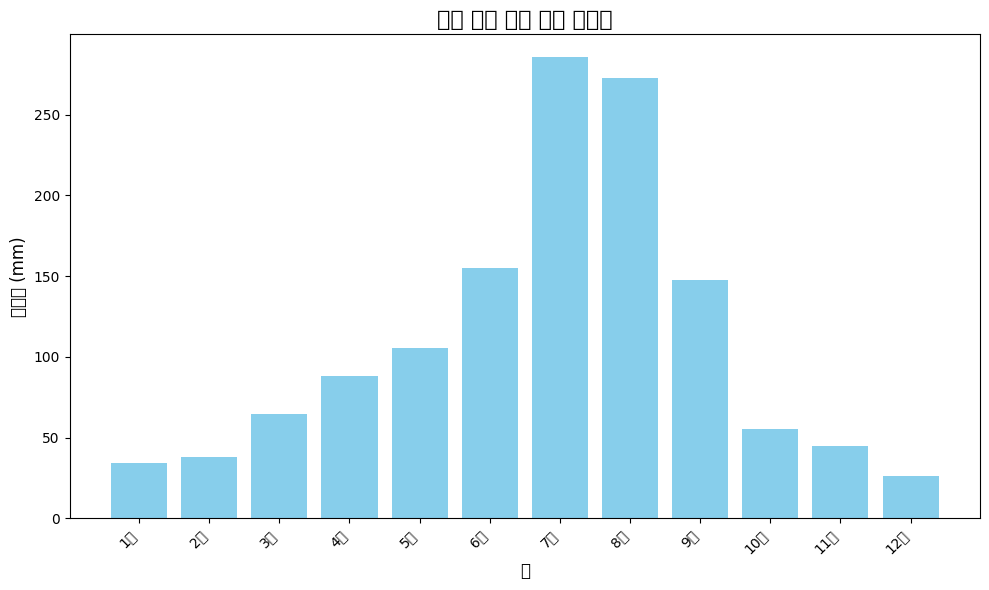

In [18]:
!pip install matplotlib

import matplotlib.pyplot as plt
import calendar

# 한국 세종의 월별 평균 강수량 (단위: mm) - 출처: 기상청
# 데이터는 예시이며, 실제 데이터와 다를 수 있습니다.
monthly_rainfall = {
    "1월": 34.5, "2월": 38.1, "3월": 64.3, "4월": 88.2,
    "5월": 105.7, "6월": 154.8, "7월": 285.4, "8월": 272.7,
    "9월": 147.5, "10월": 55.1, "11월": 44.6, "12월": 26.5
}

# 월 이름을 한국어로 표시하기 위해 calendar 모듈 사용
months = [calendar.month_name[i] for i in range(1, 13)]
months_korean = ["1월", "2월", "3월", "4월", "5월", "6월", "7월", "8월", "9월", "10월", "11월", "12월"]

# 강수량 데이터 추출
rainfall_values = [monthly_rainfall[month] for month in months_korean]

# 그래프 생성
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.bar(months_korean, rainfall_values, color='skyblue')  # 막대 그래프 생성
plt.title("한국 세종 월별 평균 강수량", fontsize=16)  # 제목 설정
plt.xlabel("월", fontsize=12)  # x축 레이블 설정
plt.ylabel("강수량 (mm)", fontsize=12)  # y축 레이블 설정
plt.xticks(rotation=45, ha='right')  # x축 눈금 레이블 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()  # 그래프 표시

In [ ]:
import bisect

In [ ]:
def grade(score, breakpoint=[60, 70, 80, 90], grades='FDCBA'):
    i = bisect.bisect(breakpoint, score)
    return grades[i]

In [ ]:
[grade(score) for score in [33, 99, 77, 70, 89, 90, 100]]

['F', 'A', 'C', 'C', 'B', 'A', 'A']


bisect.bisect() 함수는 이진 탐색 알고리즘을 사용하여 정렬된 리스트에 값을 삽입할 때 정렬을 유지할 수 있는 인덱스를 반환하는 함수입니다.

Python

    import bisect
    a = [1, 2, 3, 4, 5]
    bisect.bisect(a, 3)


bisect.bisect() 함수는 다음과 같은 매개변수를 사용합니다.

    a: 정렬된 리스트
    x: 삽입할 값
    lo: 고려할 리스트의 부분집합의 시작 인덱스 (기본값: 0)
    hi: 고려할 리스트의 부분집합의 끝 인덱스 (기본값: a의 길이)
bisect.bisect() 함수는 다음과 같은 방식으로 작동합니다.

1. a의 중간 인덱스를 찾습니다.
1. a의 중간 인덱스에 있는 값과 x를 비교합니다.
1. x가 중간 인덱스에 있는 값보다 작으면, a의 왼쪽 부분집합을 대상으로 다시 이진 탐색을 수행합니다.
1. x가 중간 인덱스에 있는 값보다 크거나 같으면, a의 오른쪽 부분집합을 대상으로 다시 이진 탐색을 수행합니다.
1. 이 과정을 반복하여 x가 **a에 삽입될 수 있는 위치**를 찾습니다.


In [ ]:
import random

class BingoCage:

    def __init__(self, items):
        self._items = list(items)
        random.shuffle(self._items)

    def pick(self):
        try:
            return self._items.pop()
        except IndexError:
            raise LookupError('pick from empty BingoCage')

    def __call__(self):
        return self.pick()

In [ ]:
bingo = BingoCage(range(3))
print(bingo.pick())
bingo()

2


1

In [ ]:
def tag(name, *content, cls=None, **attrs):
    if cls is not None:
        attrs['class'] = cls
    if attrs:
        attr_str= ''.join(' %s= "%s"' % (attr, value) for attr, value in sorted(attrs.items()))
    else:
        attr_str=''
    if content:
        return '\n'.join('<%s%s>%s</%s>' % (name, attr_str, c, name) for c in content)
    else:
        return '<%s%s />' % (name, attr_str)

In [ ]:
print(tag('br'))    # 위치 인수하나만 사용해서 호출하면 이름을 가진 빈 태그를 생성한다.
print(tag('p', 'hello'))    # 첫번째 이후의 인수들은 모두 *content 매개변수에 튜플로 전달된다.
print(tag('p', 'hello', 'world'))
print(tag('p', 'hello', id=33))    # tag 시그니처에 명시적으로 이름이 지정되지 않은 키워드 인수들은 딕셔너리로 **attrs 인수에 전달된다
print(tag('p', 'hello', 'world', cls='sidebar'))
print(tag(content='testing', name='img'))
my_tag= {'name':'img', 'title':'Sunset Boulevard', 'src':'sunset.jpg', 'cls':'framed'}
tag(**my_tag)

<br />
<p>hello</p>
<p>hello</p>
<p>world</p>
<p id= "33">hello</p>
<p class= "sidebar">hello</p>
<p class= "sidebar">world</p>
<img content= "testing" />


'<img class= "framed" src= "sunset.jpg" title= "Sunset Boulevard" />'

In [ ]:
from operator import mul
from functools import partial
triple = partial(mul, 3)    # mul()함수의 첫번째 위치인수를 3으로 바인딩해서 triple() 함수 생성
print(triple(7))
list(map(triple, range(1, 10)))

21


[3, 6, 9, 12, 15, 18, 21, 24, 27]

In [ ]:
import unicodedata, functools
nfc = functools.partial(unicodedata.normalize, 'NFC')
s1 = 'cafe\u0301'
print(s1 == nfc(s1))
print(s1)
print(nfc(s1))

False
café
café


파이썬 데코레이터는 함수에 추가 기능을 제공하는 기능입니다. 데코레이터는 함수를 감싸는 형태로 구성되며, 함수를 호출할 때마다 데코레이터가 먼저 실행됩니다.

데코레이터를 사용하면 기존 함수를 수정하지 않고도 추가 기능을 구현할 수 있습니다. 예를 들어, 다음과 같은 함수가 있다고 가정해 보겠습니다.
```
Python
def hello(name):
    print("안녕하세요, {}님!".format(name))
```
코드를 사용할 때는 주의가 필요합니다. 자세히 알아보기
이 함수를 데코레이터를 사용하여 실행 시간 측정 기능을 추가해 보겠습니다.
```
Python
import time
def timer(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        func(*args, **kwargs)
        end = time.time()
        print("실행 시간: {}초".format(end - start))
    return wrapper

@timer
def hello(name):
    print("안녕하세요, {}님!".format(name))
hello("홍길동")
```
코드를 사용할 때는 주의가 필요합니다. 자세히 알아보기
위 코드는 timer() 데코레이터를 사용하여 hello() 함수에 실행 시간 측정 기능을 추가했습니다. timer() 데코레이터는 hello() 함수를 감싸는 wrapper() 함수를 반환합니다. wrapper() 함수는 hello() 함수를 호출하기 전에 실행 시간 측정을 시작하고, hello() 함수를 호출한 후 실행 시간 측정을 종료합니다.

데코레이터를 사용하면 다음과 같은 다양한 기능을 추가할 수 있습니다.

함수 호출 전후에 로그를 남기는 기능
함수의 매개변수나 반환값을 제한하는 기능
함수의 실행 속도를 측정하는 기능
데코레이터는 파이썬에서 매우 유용한 기능으로, 다양한 상황에서 활용할 수 있습니다.

데코레이터를 사용하기 위해서는 다음과 같은 두 가지 방법이 있습니다.

함수 선언 앞에 데코레이터를 지정하는 방법
```
Python
@timer
def hello(name):
    print("안녕하세요, {}님!".format(name))
코드를 사용할 때는 주의가 필요합니다. 자세히 알아보기
함수 정의 후에 데코레이터를 적용하는 방법
Python
def hello(name):
    print("안녕하세요, {}님!".format(name))

hello = timer(hello)
```
코드를 사용할 때는 주의가 필요합니다. 자세히 알아보기
두 가지 방법은 모두 동일한 결과를 가집니다.

In [ ]:
import time

def timer(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        func(*args, **kwargs)
        end = time.time()
        print("실행 시간: {}초".format(end - start))
    return wrapper

@timer
def hello(name):
    print("안녕하세요, {}님!".format(name))

hello("홍길동")

안녕하세요, 홍길동님!
실행 시간: 0.0005860328674316406초


In [ ]:
from abc import ABC, abstractmethod
from collections import namedtuple

Customer = namedtuple('Customer', 'name fidelity')

class Lineitem:

    def __init__(self, product, quantity, price):
        self.product = product
        self.quantity = quantity
        self.price

    def total(self):
        return self.price * self.quantity


class Oder:

    def __init__(self, customer, cart, promotion=None):
        self.customer = customer
        self.cart = list(cart)
        self.promotion = promotion

    def total(self):
        if not hasattr(self, '__total'):
            self.__total = sum(item.total() for item in self.cart)
        return self.__total

    def due(self):
        if self.promotion is None:
            discount = 0
        else:
            discount = self.promotion.discount(self)
        return self.total() - discount

    def __repr__(self):
        fmt = '<Order total: {:.2f} due: {:.2f}>'
        return fmt.format(self.total(), self.due())

class Promotion(ABC)    # 전략: 추상베이스 클래스

    @abstractmethod
    def discount(self, order):
        """할인액을 구체적인 숫자로 반환한다."""

class FidelityPromo(Promotion):    # 첫번째 구체적인 전략
    """충성도 포인트가 1000점 이상인 고객에게 전체 5% 할인 적용"""

    def discount(self, order):
        return order.total() * 0.05 if order.customer.fidelity >= 1000 else 0

class BulkItemPromo(Promotion):   # 두번째 구체적인 전략
    """20개 이상의 동일 상품을 구입하면 10% 할인 적용"""

    def discount(self, order):
        discount = 0
        for item in order.cart:
            if item.quantity >= 20:
                discount += item.total() * 0.1
        return discount

class LargeOrderPromo(Promotion)    # 세번째 구체적인 전략
    """10종류 이상의 상품을 구입하면 전체 7% 할인 적용"""

    def discount(self, order):
        discount_item = {item.product for item in order.cart}
        if len(distinct_items) >= 10:
            return order.total() * 0.07
        return 0








